In [1]:
import pandas as pd
from pathlib import Path
import os
import numpy

In [34]:
# read in the data
# path2data = Path.joinpath(Path.cwd().parent,'data','BorderCrossingEntryData.csv')
dataPath = Path.joinpath(Path.cwd(),'BorderCrossingEntryData.csv')
df = pd.read_csv(dataPath)
df.sample(3)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
37314,International Falls-Ranier,Minnesota,3604,US-Canada Border,11/1/2015 0:00,Pedestrians,710,POINT (-93.4 48.61)
203536,Hansboro,North Dakota,3415,US-Canada Border,6/1/2005 0:00,Rail Containers Full,0,POINT (-99.35 49)
326965,Laurier,Washington,3016,US-Canada Border,4/1/1997 0:00,Truck Containers Full,0,POINT (-118.22 49)


In [35]:
#df['Measure'].value_counts()

In [44]:
# Only interested in Passenger / Pedestrian crossings
people = df['Measure'].str.contains('Passengers|Pedestrians', case = False)

In [45]:
# Check to see how much data frame shrinks after filtering down
print(f'All measures: {df.shape}')
#df = df[people] # This gave index error when re-running, changed to df.loc
df = df.loc[people]
print(f'Just people: {df.shape}')

All measures: (115336, 8)
Just people: (115336, 8)


In [46]:
df.sample(3)

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
39100,Buffalo-Niagara Falls,New York,901,US-Canada Border,10/1/2015 0:00,Train Passengers,1961,POINT (-78.91 42.91)
167382,Calexico East,California,2507,US-Mexico Border,9/1/2007 0:00,Pedestrians,468,POINT (-115.39 32.67)
314396,Sault Sainte Marie,Michigan,3803,US-Canada Border,3/1/1998 0:00,Train Passengers,102,POINT (-84.36000000000001 46.51)


In [47]:
# Drop unnecessary columns 
df.drop(['Port Code','Port Name'],axis=1,inplace=True)

In [48]:
df.sample(3)

,State,Border,Date,Measure,Value,Location
115197,Maine,US-Canada Border,12/1/2010 0:00,Personal Vehicle Passengers,5042,POINT (-67.43 45.57)
279633,North Dakota,US-Canada Border,7/1/2000 0:00,Personal Vehicle Passengers,6880,POINT (-102.27 49)
218608,California,US-Mexico Border,7/1/2004 0:00,Personal Vehicle Passengers,122830,POINT (-114.73000000000002 32.72)


In [60]:
# are there any null values?
df.isnull().sum()

State       0
Border      0
Date        0
Measure     0
Value       0
Location    0
newDate     0
Year        0
Month       0
dtype: int64

In [50]:
# Handle the Date column
df['newDate'] = pd.to_datetime(df['Date'])

In [57]:
# Inspect the date column
df['Year'] = df['newDate'].dt.year
df['Month'] = df['newDate'].dt.month
# How many years of data available?
maxYear = df['newDate'].dt.year.max()
minYear = df['newDate'].dt.year.min()
print(f'From {minYear} to {maxYear} for total of {maxYear-minYear} year(s) of data.')

From 1996 to 2019 for total of 23 year(s) of data.


In [65]:
df.groupby(['Border','Year'])[['Value']].sum()

Value
Border           Year           
US-Canada Border 1996  105762398
                 1997   97570223
                 1998   93097261
                 1999   94573669
                 2000   95776909
                 2001   80433778
                 2002   74539094
                 2003   67092234
                 2004   68215987
                 2005   67205812
                 2006   67264835
                 2007   62765526
                 2008   61561658
                 2009   56625807
                 2010   59885377
                 2011   62319454
                 2012   65137704
                 2013   65436148
                 2014   62648209
                 2015   54892052
                 2016   52500249
                 2017   52736731
                 2018   54032240
                 2019    9791121
US-Mexico Border 1996  207586832
                 1997  261050472
                 1998  274125727
                 1999  293109831
                 2000  290368364
                 2001  263992857
                 2002  253240235
                 2003  246120241
                 2004  242422023
                 2005  235084672
                 2006  228715214
                 2007  217482762
                 2008  206301125
                 2009  184765055
                 2010  168347492
                 2011  153706850
                 2012  159061181
                 2013  166151041
                 2014  173260603
                 2015  181281186
                 2016  185155513
                 2017  187965778
                 2018  192913686
                 2019   46064494

In [69]:
import seaborn as sns
%matplotlib inline

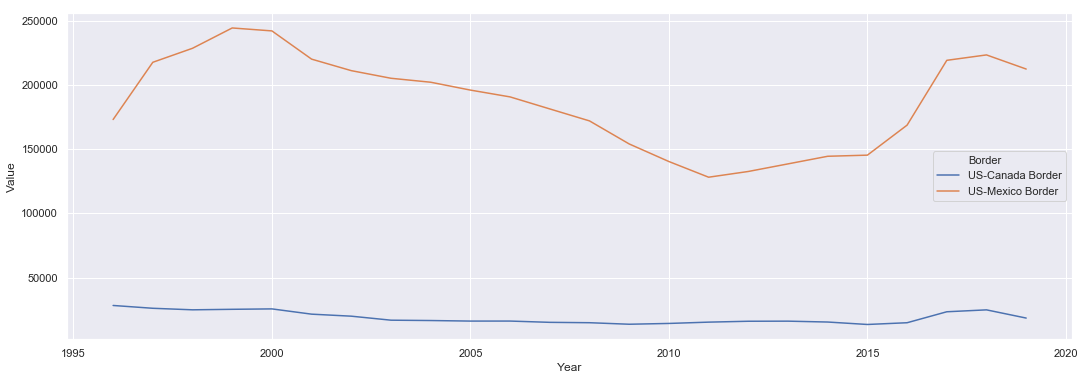

In [75]:
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(x = 'Year', y = 'Value', hue = 'Border', ci=None, data = df);